# unemployment and activity rate in Italy // foreign and Italian

# unemployment rate

In [201]:
# install packages
!pip install plotly
!pip install chart_studio

In [202]:
# per la chart
!pip install jupyter-dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [203]:
# import packages
import pandas as pd
import numpy as np
import scipy as sp
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go

In [204]:
#first, a list with the more relevant names of the columns is createad
infocol = ["Territory", "Data type", "Gender", "Highest level of education attained", "Citizenship", "TIME", "Value"]
#then, the csv files are read and we use the list created before to only have information about those

unem_r_Df = pd.read_csv('https://raw.githubusercontent.com/openaccesstoimmigrants/openaccesstoimmigrants/main/_datasets/ISTAT_Unemployment_rate_region_2018_2022_.csv')[infocol]

In [205]:
#here a function is defined in order to delete rows that might not interest us
def delete_row(dataframe, column_name, value_to_delete):
    filtered_dataframe = dataframe[dataframe[column_name] != value_to_delete]

    return filtered_dataframe

In [206]:
#sometimes the year value might include information about quarters, so this is another function to take only the values with 4 digits
def y_val(dataframe):

    dataframe['TIME'] = dataframe['TIME'].astype('str')
    mask = (dataframe['TIME'].str.len() == 4)
    dataframe= dataframe.loc[mask]

    return dataframe

In [207]:
#applying the year function for the unem_r_Df
unem_r_Df = y_val(unem_r_Df)

In [208]:
#applying the deletion function to take out rows we're not interested
unem_r_Df = delete_row(unem_r_Df, "Gender", "females")
unem_r_Df = delete_row(unem_r_Df, "Gender", "males")
unem_r_Df = delete_row(unem_r_Df, "Citizenship", "total")
unem_r_Df

,Territory,Data type,Gender,Highest level of education attained,Citizenship,TIME,Value
150,Italy,unemployment rate,total,upper and post secondary,italian,2018,9.715354
155,Italy,unemployment rate,total,upper and post secondary,italian,2019,8.966533
160,Italy,unemployment rate,total,upper and post secondary,italian,2020,8.425699
165,Italy,unemployment rate,total,upper and post secondary,italian,2021,8.673861
166,Italy,unemployment rate,total,upper and post secondary,italian,2022,7.368649
...,...,...,...,...,...,...,...
11497,Centro (I),unemployment rate,total,"no educational degree, primary and lower secon...",italian,2018,11.549672
11502,Centro (I),unemployment rate,total,"no educational degree, primary and lower secon...",italian,2019,9.998387
11507,Centro (I),unemployment rate,total,"no educational degree, primary and lower secon...",italian,2020,10.639449
11512,Centro (I),unemployment rate,total,"no educational degree, primary and lower secon...",italian,2021,11.358337


In [209]:
def filter_dataframe_by_value(df, column, value):
    """
    Keep only the rows where the specified column has the given value.

    Parameters:
    - df: pandas DataFrame
    - column: str, column name
    - value: value to filter on

    Returns:
    - pandas DataFrame with filtered rows
    """
    return df[df[column] == value]

In [210]:
filtered_df = filter_dataframe_by_value(unem_r_Df, 'Territory', 'Italy')
filtered_df
filtered_dfDEF = filter_dataframe_by_value(filtered_df, 'Highest level of education attained', 'total')
filtered_dfDEF

,Territory,Data type,Gender,Highest level of education attained,Citizenship,TIME,Value
200,Italy,unemployment rate,total,total,italian,2018,10.182574
205,Italy,unemployment rate,total,total,italian,2019,9.468407
210,Italy,unemployment rate,total,total,italian,2020,8.891429
215,Italy,unemployment rate,total,total,italian,2021,8.957717
216,Italy,unemployment rate,total,total,italian,2022,7.620690
925,Italy,unemployment rate,total,total,foreign,2018,13.973459
930,Italy,unemployment rate,total,total,foreign,2019,13.783589
935,Italy,unemployment rate,total,total,foreign,2020,13.315631
940,Italy,unemployment rate,total,total,foreign,2021,14.372673
941,Italy,unemployment rate,total,total,foreign,2022,11.999410


In [211]:
filtered_dfDEF = filtered_dfDEF.drop('Gender', axis=1)
filtered_dfDEF = filtered_dfDEF.drop('Highest level of education attained', axis=1)
filtered_dfDEF

,Territory,Data type,Citizenship,TIME,Value
200,Italy,unemployment rate,italian,2018,10.182574
205,Italy,unemployment rate,italian,2019,9.468407
210,Italy,unemployment rate,italian,2020,8.891429
215,Italy,unemployment rate,italian,2021,8.957717
216,Italy,unemployment rate,italian,2022,7.620690
925,Italy,unemployment rate,foreign,2018,13.973459
930,Italy,unemployment rate,foreign,2019,13.783589
935,Italy,unemployment rate,foreign,2020,13.315631
940,Italy,unemployment rate,foreign,2021,14.372673
941,Italy,unemployment rate,foreign,2022,11.999410


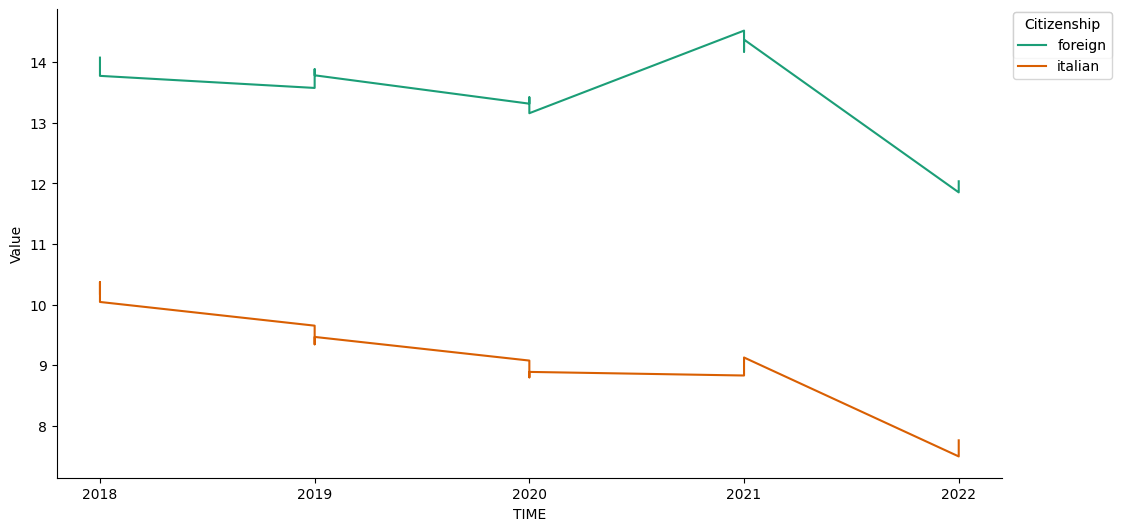

In [212]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['TIME']
  ys = series['Value']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = filtered_dfDEF.sort_values('TIME', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Citizenship')):
  _plot_series(series, series_name, i)
  fig.legend(title='Citizenship', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TIME')
_ = plt.ylabel('Value')

In [213]:
for18_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2018') & (filtered_dfDEF['Citizenship'] == 'foreign')]
for19_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2019') & (filtered_dfDEF['Citizenship'] == 'foreign')]
for20_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2020') & (filtered_dfDEF['Citizenship'] == 'foreign')]
for21_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2021') & (filtered_dfDEF['Citizenship'] == 'foreign')]
for22_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2022') & (filtered_dfDEF['Citizenship'] == 'foreign')]

In [214]:
unemFor18 = for18_filtered_dfDEF['Value'].sum()
unemFor19 = for19_filtered_dfDEF['Value'].sum()
unemFor20 = for20_filtered_dfDEF['Value'].sum()
unemFor21 = for21_filtered_dfDEF['Value'].sum()
unemFor22 = for22_filtered_dfDEF['Value'].sum()

unFo = [unemFor18, unemFor19, unemFor20, unemFor21, unemFor22]

In [215]:
it18_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2018') & (filtered_dfDEF['Citizenship'] == 'italian')]
it19_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2019') & (filtered_dfDEF['Citizenship'] == 'italian')]
it20_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2020') & (filtered_dfDEF['Citizenship'] == 'italian')]
it21_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2021') & (filtered_dfDEF['Citizenship'] == 'italian')]
it22_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2022') & (filtered_dfDEF['Citizenship'] == 'italian')]

In [216]:
unemIt18 = it18_filtered_dfDEF['Value'].sum()
unemIt19 = it19_filtered_dfDEF['Value'].sum()
unemIt20 = it20_filtered_dfDEF['Value'].sum()
unemIt21 = it21_filtered_dfDEF['Value'].sum()
unemIt22 = it22_filtered_dfDEF['Value'].sum()

unIt = [unemIt18, unemIt19, unemIt20, unemIt21, unemIt22]
unIt

[30.601441, 28.469155, 26.771701, 26.918836, 22.880703]

In [217]:
year = ['2018', '2019', '2020', '2021', '2022', '2018', '2019', '2020', '2021', '2022']
citizenship = ['foreign', 'foreign', 'foreign', 'foreign', 'foreign','italian', 'italian', 'italian', 'italian', 'italian']
unemploymentRates  = unFo + unIt

In [218]:
df = pd.DataFrame({'Citizenship': citizenship, 'TIME': year, 'Value': unemploymentRates})
df

,Citizenship,TIME,Value
0,foreign,2018,41.822973
1,foreign,2019,41.242528
2,foreign,2020,39.894820
3,foreign,2021,43.067069
4,foreign,2022,35.887609
5,italian,2018,30.601441
6,italian,2019,28.469155
7,italian,2020,26.771701
8,italian,2021,26.918836
9,italian,2022,22.880703


In [219]:
df['GDP'] = '1'  # Set a default value for the new column
df.loc[df['TIME'] == '2018', 'GDP'] = 0.925811
df.loc[df['TIME'] == '2019', 'GDP'] = 0.483198
df.loc[df['TIME'] == '2020', 'GDP'] = -8.974192
df.loc[df['TIME'] == '2021', 'GDP'] = 8.31376
df.loc[df['TIME'] == '2022', 'GDP'] = 3.724549
df['GDP'] = df['GDP'].astype(float)
df['TIME'] = df['TIME'].astype(int)
df = df.rename(columns={'Value': '% Unemployment'})
df = df.rename(columns={'TIME': 'Year'})
df

,Citizenship,Year,% Unemployment,GDP
0,foreign,2018,41.822973,0.925811
1,foreign,2019,41.242528,0.483198
2,foreign,2020,39.894820,-8.974192
3,foreign,2021,43.067069,8.313760
4,foreign,2022,35.887609,3.724549
5,italian,2018,30.601441,0.925811
6,italian,2019,28.469155,0.483198
7,italian,2020,26.771701,-8.974192
8,italian,2021,26.918836,8.313760
9,italian,2022,22.880703,3.724549


In [220]:
df['Change in Unemployment Rate'] = df['% Unemployment'].diff()
df['Change in GDP'] = df['GDP'].diff()

# Define the Okun's coefficient (you can adjust this value based on your analysis)
okuns_coefficient = 0.5

# Calculate the Okun's Law relationship
df['Okun\'s Law'] = -okuns_coefficient * df['Change in GDP']

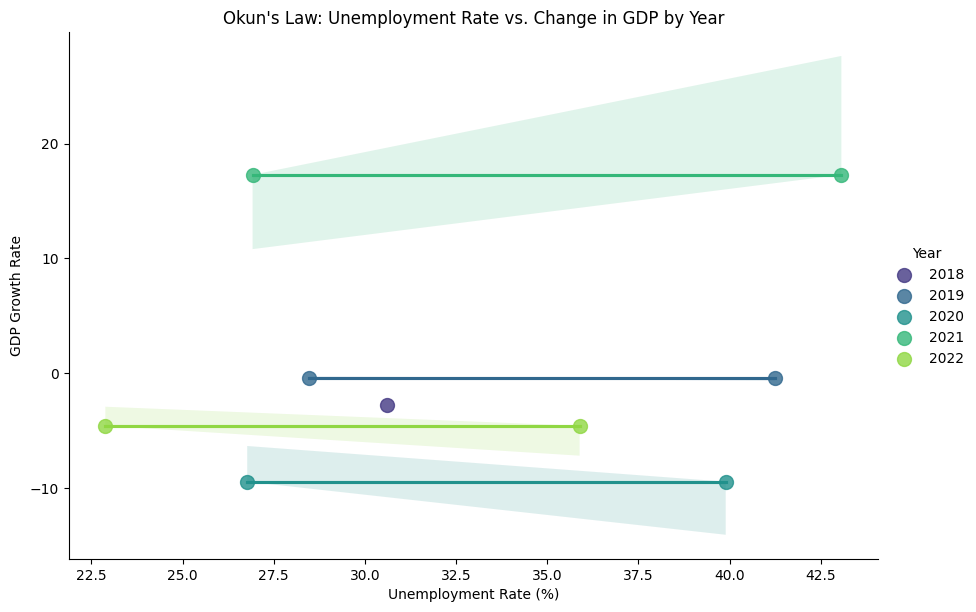

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains columns: 'Year', '% Unemployment', 'GDP Growth Rate', 'Citizenship'

# Filter out NaN values
df_filtered = df.dropna(subset=['% Unemployment', 'Change in GDP'])

# Scatterplot with regression line
sns.lmplot(x='% Unemployment', y='Change in GDP', hue='Year', data=df_filtered, markers='o',
           scatter_kws={'s': 100}, palette='viridis', height=6, aspect=1.5)

# Set plot labels and title
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('GDP Growth Rate')
plt.title('Okun\'s Law: Unemployment Rate vs. Change in GDP by Year')

# Show the plot
plt.show()


In [222]:
df["Year"] = df["Year"].astype(int)

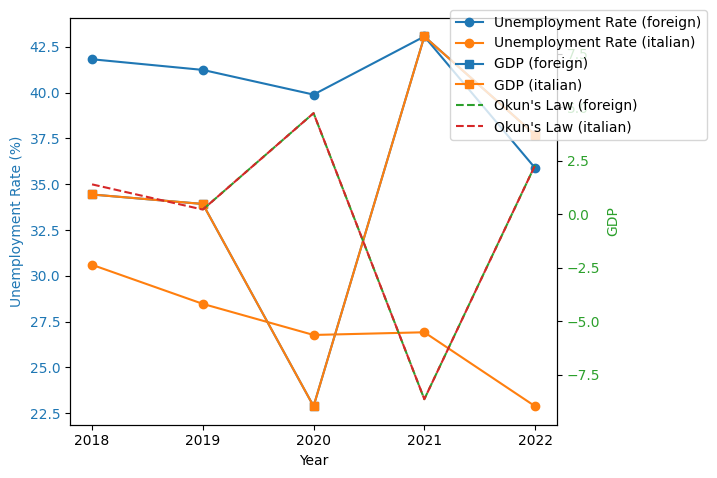

In [223]:
desired_years = [2018, 2019, 2020, 2021, 2022]


citizenship_groups = df.groupby('Citizenship')
# Plotting
fig, ax1 = plt.subplots()

# Plot the Unemployment Rate for each citizenship group
for group_name, group_df in citizenship_groups:
    ax1.plot(group_df['Year'], group_df['% Unemployment'], marker='o', label=f'Unemployment Rate ({group_name})')

ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate (%)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for GDP
ax2 = ax1.twinx()
ax2.set_ylabel('GDP', color='tab:green')

# Plot the GDP for each citizenship group
for group_name, group_df in citizenship_groups:
    ax2.plot(group_df['Year'], group_df['GDP'], marker='s', label=f'GDP ({group_name})')

ax2.tick_params(axis='y', labelcolor='tab:green')

# Display Okun's Law on the same chart for each citizenship group
for group_name, group_df in citizenship_groups:
    ax2.plot(group_df['Year'], group_df["Okun's Law"], linestyle='--', label=f"Okun's Law ({group_name})")


plt.xticks(desired_years)
# Display the legend
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.7, 1.0))

# Display the chart
plt.show()

In [224]:
# Set the desired fixed years
desired_years = [2018, 2019, 2020, 2021, 2022]

# Group by Citizenship
citizenship_groups = df.groupby('Citizenship')

# Create traces for Unemployment Rate, GDP, and Okun's Law
traces = []

for group_name, group_df in citizenship_groups:
    # Unemployment Rate trace
    trace_unemployment = go.Scatter(x=group_df['Year'], y=group_df['% Unemployment'],
                                   mode='markers+lines', name=f'Unemployment Rate ({group_name})',
                                   line=dict(color='blue'), marker=dict(symbol='circle', size=8))

    # Okun's Law trace
    trace_okun = go.Scatter(x=group_df['Year'], y=group_df["Okun's Law"],
                            mode='markers+lines', name=f"Okun's Law ({group_name})",
                            line=dict(color='red', dash='dash'), marker=dict(symbol='diamond', size=8))

    traces.extend([trace_unemployment, trace_okun])

# Separate trace for GDP
trace_gdp = go.Scatter(x=df['Year'], y=df['GDP'],
                       mode='markers+lines', name='GDP',
                       line=dict(color='green'), marker=dict(symbol='square', size=8))

traces.append(trace_gdp)

# Create layout
layout = go.Layout(title='Unemployment Rate, GDP, and Okun\'s Law Over Years',
                   xaxis=dict(title='Year', tickmode='array', tickvals=desired_years),
                   yaxis=dict(title='Percentage'))

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Display the chart
fig.show()


# activity rate (to finish)

In [225]:
#first, a list with the more relevant names of the columns is createad
infocol = ["Territory", "Data type", "Gender", "Highest level of education attained", "Citizenship", "TIME", "Value"]
#then, the csv files are read and we use the list created before to only have information about those

act_r_Df = pd.read_csv('https://raw.githubusercontent.com/openaccesstoimmigrants/openaccesstoimmigrants/main/_datasets/ISTAT_Activity_Rate_Region_2018-2022.csv')[infocol]

In [226]:
#here a function is defined in order to delete rows that might not interest us
def delete_row(dataframe, column_name, value_to_delete):
    filtered_dataframe = dataframe[dataframe[column_name] != value_to_delete]

    return filtered_dataframe

In [227]:
#sometimes the year value might include information about quarters, so this is another function to take only the values with 4 digits
def y_val(dataframe):

    dataframe['TIME'] = dataframe['TIME'].astype('str')
    mask = (dataframe['TIME'].str.len() == 4)
    dataframe= dataframe.loc[mask]

    return dataframe

In [228]:
#applying the year function for the unem_r_Df
act_r_Df = y_val(act_r_Df)

In [229]:
#applying the deletion function to take out rows we're not interested
act_r_Df = delete_row(act_r_Df, "Gender", "females")
act_r_Df = delete_row(act_r_Df, "Gender", "males")
act_r_Df = delete_row(act_r_Df, "Citizenship", "total")
act_r_Df

,Territory,Data type,Gender,Highest level of education attained,Citizenship,TIME,Value
70,Nord,activity rate,total,upper and post secondary,italian,2018,77.752350
75,Nord,activity rate,total,upper and post secondary,italian,2019,78.047852
80,Nord,activity rate,total,upper and post secondary,italian,2020,75.893370
85,Nord,activity rate,total,upper and post secondary,italian,2021,76.125884
86,Nord,activity rate,total,upper and post secondary,italian,2022,77.425111
...,...,...,...,...,...,...,...
9785,Nord,activity rate,total,"no educational degree, primary and lower secon...",foreign,2018,72.856408
9790,Nord,activity rate,total,"no educational degree, primary and lower secon...",foreign,2019,73.120475
9795,Nord,activity rate,total,"no educational degree, primary and lower secon...",foreign,2020,66.737652
9800,Nord,activity rate,total,"no educational degree, primary and lower secon...",foreign,2021,70.147612


In [230]:
def filter_dataframe_by_value(df, column, value):
    """
    Keep only the rows where the specified column has the given value.

    Parameters:
    - df: pandas DataFrame
    - column: str, column name
    - value: value to filter on

    Returns:
    - pandas DataFrame with filtered rows
    """
    return df[df[column] == value]

In [231]:
filtered_df = filter_dataframe_by_value(act_r_Df, 'Territory', 'Italy')
filtered_df
filtered_dfDEF = filter_dataframe_by_value(filtered_df, 'Highest level of education attained', 'total')
filtered_dfDEF

,Territory,Data type,Gender,Highest level of education attained,Citizenship,TIME,Value


In [232]:
filtered_dfDEF = filtered_dfDEF.drop('Gender', axis=1)
filtered_dfDEF = filtered_dfDEF.drop('Highest level of education attained', axis=1)
filtered_dfDEF

,Territory,Data type,Citizenship,TIME,Value


In [234]:
for18_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2018') & (filtered_dfDEF['Citizenship'] == 'foreign')]
for19_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2019') & (filtered_dfDEF['Citizenship'] == 'foreign')]
for20_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2020') & (filtered_dfDEF['Citizenship'] == 'foreign')]
for21_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2021') & (filtered_dfDEF['Citizenship'] == 'foreign')]
for22_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2022') & (filtered_dfDEF['Citizenship'] == 'foreign')]

In [235]:
unemFor18 = for18_filtered_dfDEF['Value'].sum()
unemFor19 = for19_filtered_dfDEF['Value'].sum()
unemFor20 = for20_filtered_dfDEF['Value'].sum()
unemFor21 = for21_filtered_dfDEF['Value'].sum()
unemFor22 = for22_filtered_dfDEF['Value'].sum()

unFo = [unemFor18, unemFor19, unemFor20, unemFor21, unemFor22]

In [236]:
it18_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2018') & (filtered_dfDEF['Citizenship'] == 'italian')]
it19_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2019') & (filtered_dfDEF['Citizenship'] == 'italian')]
it20_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2020') & (filtered_dfDEF['Citizenship'] == 'italian')]
it21_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2021') & (filtered_dfDEF['Citizenship'] == 'italian')]
it22_filtered_dfDEF = filtered_dfDEF[(filtered_dfDEF['TIME'] == '2022') & (filtered_dfDEF['Citizenship'] == 'italian')]

In [237]:
unemIt18 = it18_filtered_dfDEF['Value'].sum()
unemIt19 = it19_filtered_dfDEF['Value'].sum()
unemIt20 = it20_filtered_dfDEF['Value'].sum()
unemIt21 = it21_filtered_dfDEF['Value'].sum()
unemIt22 = it22_filtered_dfDEF['Value'].sum()

unIt = [unemIt18, unemIt19, unemIt20, unemIt21, unemIt22]
unIt

[0.0, 0.0, 0.0, 0.0, 0.0]

In [238]:
year = ['2018', '2019', '2020', '2021', '2022', '2018', '2019', '2020', '2021', '2022']
citizenship = ['foreign', 'foreign', 'foreign', 'foreign', 'foreign','italian', 'italian', 'italian', 'italian', 'italian']
unemploymentRates  = unFo + unIt

In [239]:
df = pd.DataFrame({'Citizenship': citizenship, 'TIME': year, 'Value': unemploymentRates})
df

,Citizenship,TIME,Value
0,foreign,2018,0.0
1,foreign,2019,0.0
2,foreign,2020,0.0
3,foreign,2021,0.0
4,foreign,2022,0.0
5,italian,2018,0.0
6,italian,2019,0.0
7,italian,2020,0.0
8,italian,2021,0.0
9,italian,2022,0.0
